In [1]:
#Köksal Kapucuoğlu
#########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
#import any other non-machine learning modules that you wish
#SHORTCUTS: Alt + Enter includes new cell below, CTRL + Enter executes the current cell
##########################
df1 = pd.read_csv("train1.csv")
df2 = pd.read_csv("train2.csv") 
df2m = pd.read_csv("train2_modified.csv") #will be used in Part D

In [2]:
#By printing a dataframe, you can view the data in csv format
print(df1) # x1 and x2 are features and y is label.


           x1        x2  y
0   -0.260234  2.767817  0
1    3.466190  6.054691  1
2   -2.036224  4.491902  0
3    2.434426  6.638656  1
4   -0.541338  3.210246  0
..        ...       ... ..
195  1.832132  6.247191  1
196  1.215533  5.750448  1
197 -0.464053  3.034393  0
198  2.638937  5.043589  1
199 -0.439450  3.853694  0

[200 rows x 3 columns]


In [3]:
#You can extract keys from dataframe, which you can use to extract features or labels.
print(df1.keys())
df1_x1 = df1['x1']
df1_x2 = df1['x2']
#To extract data as numpy array:
df1_numpy = df1.values
#You can also extract a specific feature as numpy array as well.
df1_x1_numpy = df1['x1'].values

Index(['x1', 'x2', 'y'], dtype='object')


In [4]:
class Train:
    def __init__(self, df):
        self.df_c1 = df[df['y']==0] #get class1 for  set, [x1 x2 y]
        self.df_c2 = df[df['y']==1] #get class2 for  set, [x1 x2 y]
        self.X_c1 = pd.DataFrame(self.df_c1, columns = ['x1', 'x2']) #features of class1 at  set, [x1 x2]
        self.X_c2 = pd.DataFrame(self.df_c2, columns = ['x1', 'x2']) #features of class2 at  set, [x1 x2]
        self.N_c1 = self.X_c1.shape[0] # samples number of class1 at  set
        self.N_c2 = self.X_c2.shape[0] # samples number of class2 at  set
        self.X = pd.DataFrame(df, columns = ['x1', 'x2']) #features of  set [x1 x2]
        self.y = pd.DataFrame(df, columns = ['y']) #label of  set [y]
        self.N = df.shape[0] # samples number of set
        
        mean_vctr_c1 = np.mean(self.X_c1, axis=0) #calculate mean vector for class1
        self.mu_c1 = pd.DataFrame(data=mean_vctr_c1)
        mean_vctr_c2 = np.mean(self.X_c2, axis=0) #calculate mean vector for class2
        self.mu_c2 = pd.DataFrame(data=mean_vctr_c2)
        
        self.covmat_c1 = self.calcovmat(self.X_c1, self.N_c1) #calculate covariant matrix for class1
        self.covmat_c2 = self.calcovmat(self.X_c2, self.N_c2) #calculate covariant matrix for class2
        
        
        self.p_c1 = self.N_c1 / self.N #calculate p(ci) for class 1
        self.p_c2 = self.N_c2 / self.N #calculate p(ci) for class 2
        
    def calculatevariance(self, Xi, N): #Xi =  i.th feature column, N = number of samples
        Xim=np.average(Xi)  #get mean, same function as np.mean(Xi, axis=0)
        var = 0.0
        for i in range(N):
            var = ((Xi.values[i] - Xim)**2) + var
        return  (1./(N))*var
    
    
    #covariance(xi,xi) = variance(xi)
    def calculatecovariance(self,Xi, Xk, N):#Xi =  i.th feature column, Xk =  k.th feature column, N = number of samples
        Xim=np.average(Xi) 
        Xkm=np.average(Xk)
        cov = 0.0
        for i in range(N):
            cov = (Xi.values[i]-Xim)*(Xk.values[i]-Xkm) + cov
        return  (1./(N))*cov
    
    def calcovmat(self,Xi,N):
        varx1 = self.calculatevariance(Xi["x1"], N)
        varx2 = self.calculatevariance(Xi["x2"], N)
        covx1x2 = self.calculatecovariance(Xi["x1"],Xi["x2"], N)
        covx2x1 = self.calculatecovariance(Xi["x2"],Xi["x1"], N)
        cov_mtrx = [[varx1,covx1x2],[covx2x1,varx2]]
        cov_mtrx = pd.DataFrame(data = np.array(cov_mtrx))
        return cov_mtrx
    
    def mu_list(self): 
        self.mu_list = []
        self.mu_list.append(self.mu_c1 )
        self.mu_list.append(self.mu_c2 )
        return self.mu_list
    
    def covmat_list(self): 
        self.covmat_list = []
        self.covmat_list.append(self.covmat_c1 )
        self.covmat_list.append(self.covmat_c2 )
        return self.covmat_list
    
    def p_list(self): 
        self.p_list = []
        self.p_list.append(self.p_c1 )
        self.p_list.append(self.p_c2 )
        return self.p_list

In [5]:
#to Train train1 set
train1 = Train(df1)
X1_c1 = train1.X_c1
X1_c2 = train1.X_c2
N1_c1 = train1.N_c1
N1_c2 = train1.N_c2
p1_c1 = train1.p_c1
p1_c2 = train1.p_c2

covmat1_c1 = train1.calcovmat(X1_c1, N1_c1)
covmat1_c2 = train1.calcovmat(X1_c2, N1_c2)

mulist1 = train1.mu_list()
covmatlist1 = train1.covmat_list()
plist1 = train1.p_list()

#to Train train2 set
train2 = Train(df2)
X2_c1 = train2.X_c1
X2_c2 = train2.X_c2
N2_c1 = train2.N_c1
N2_c2 = train2.N_c2
p2_c1 = train2.p_c1
p2_c2 = train2.p_c2

covmat2_c1 = train2.calcovmat(X2_c1, N2_c1)
covmat2_c2= train2.calcovmat(X2_c2, N2_c2)

mulist2 = train2.mu_list()
covmatlist2 = train2.covmat_list()
plist2 = train2.p_list()


In [6]:
print(covmat1_c1.values)
print("*******************************")
print(covmat1_c2.values)
print("*******************************")
print(covmat2_c1.values)
print("*******************************")
print(covmat2_c2.values)

[[ 1.13557089 -0.37320387]
 [-0.37320387  2.08327195]]
*******************************
[[ 1.13557089 -0.37320387]
 [-0.37320387  2.08327195]]
*******************************
[[1.91970895 0.85690451]
 [0.85690451 2.83579458]]
*******************************
[[ 0.99645235 -0.81777973]
 [-0.81777973  2.94594199]]


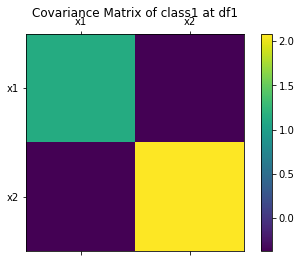

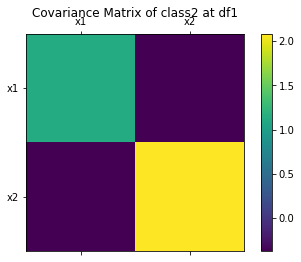

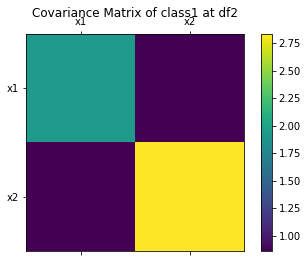

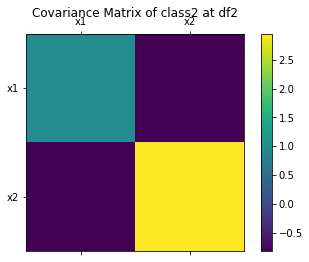

In [7]:
#PART A: Examine training sets here. plots etc.
#Hint: df1_class0 = df1[df1['column_name']==0] creates a new dataframe and includes samples (rows) whose class values are 0
#hint: for data distribution plots use plt.scatter(x-axis,y-axis,other params. check online)
#Hint: for each new plot use plt.figure() so they won't overlap, one on top of another
#-------
#to plot cov. matrices you may use following code: (compute 'cov_mtrx' by yourself)
alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(covmat1_c1,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
ax.set_title("Covariance Matrix of class1 at df1")
plt.show()

alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(covmat1_c2,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
ax.set_title("Covariance Matrix of class2 at df1")
plt.show()

alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(covmat2_c1,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
ax.set_title("Covariance Matrix of class1 at df2")
plt.show()

alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(covmat2_c2,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
ax.set_title("Covariance Matrix of class2 at df2")
plt.show()
#---------
#for the histogram plots use plt.hist() (Remember: 4 of them we want)
#for title use: plt.gca().set(title='Data distribution of feature x of trainingSet y', ylabel='Frequency')

# A-1

variance of variable describes how much it is spread out.
var(xi) > var(xj): feature xi more spread out than feature xj

covariance measures the amount of dependency between x1 and x2 varirables.
cov(xi,xj) = 0: these features are indepentend,uncorrelated. So (xi,xj) points are in the form of balls scattered all over. 


## for class1 at train1

Because of var(x2)>var(x1)(feature x2 has higher variance than feature x2), feature x2 more spread out than feature x1.
Because of cov(x1,x2) or cov(x2,x1)<0(actually very close to zero) features have negative correlations.

## for class2 at train1

Because of var(x2)>var(x1)(feature x2 has higher variance than feature x2), feature x2 more spread out than feature x1.
Because of cov(x1,x2) or cov(x2,x1)<0(actually very close to zero) features have negative correlations. 

## for class1 at train2

Because of var(x2)>var(x1)(feature x2 has higher variance than feature x2), feature x2 more spread out than feature x1.
Because of cov(x1,x2) or cov(x2,x1)>0, features have positive correlations. 

## for class2 at train2

Because of var(x2)>var(x1)(feature x2 has higher variance than feature x2), feature x2 more spread out than feature x1.
Because of cov(x1,x2) or cov(x2,x1)<0, features have negative correlations. 


## Result

at train1, covariance values < 0 but they are very close to zero. So (x1,x2) points both negative correlation and scattered. This may see in A-3.figure

at train2, for class1, features have positive correlations but for class2 have negative correlations. This is clearly seen in A-3.figure


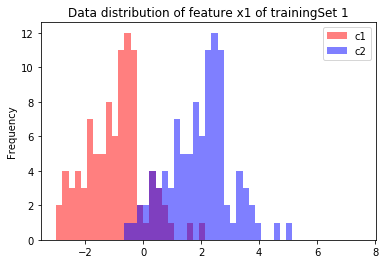

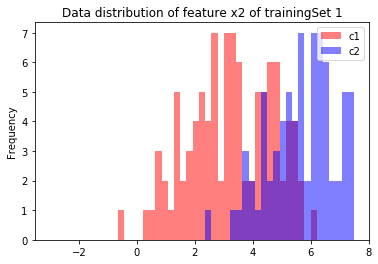

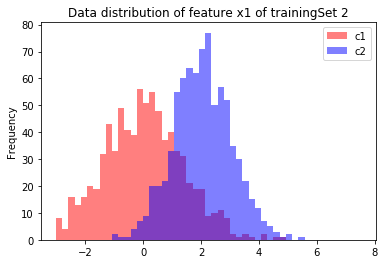

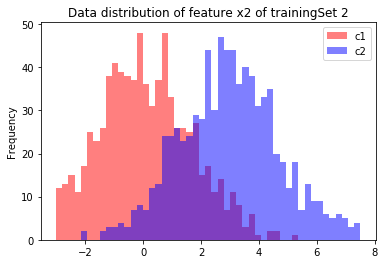

In [8]:
bins = np.linspace(-3, 7.5)
plt.hist(X1_c1["x1"], bins, alpha=0.5, label='c1',color = 'r')
plt.hist(X1_c2["x1"], bins, alpha=0.5, label='c2', color='b')
plt.gca().set(title='Data distribution of feature x1 of trainingSet 1', ylabel='Frequency')
plt.legend(loc='upper right')
plt.show()

plt.hist(X1_c1["x2"], bins, alpha=0.5, label='c1', color="r")
plt.hist(X1_c2["x2"], bins, alpha=0.5, label='c2', color="b")
plt.gca().set(title='Data distribution of feature x2 of trainingSet 1', ylabel='Frequency')
plt.legend(loc='upper right')
plt.show()

plt.hist(X2_c1["x1"], bins, alpha=0.5, label='c1', color="r")
plt.hist(X2_c2["x1"], bins, alpha=0.5, label='c2', color="b")
plt.gca().set(title='Data distribution of feature x1 of trainingSet 2', ylabel='Frequency')
plt.legend(loc='upper right')
plt.show()

plt.hist(X2_c1["x2"], bins, alpha=0.5, label='c1', color="r")
plt.hist(X2_c2["x2"], bins, alpha=0.5, label='c2', color="b")
plt.gca().set(title='Data distribution of feature x2 of trainingSet 2', ylabel='Frequency')
#plt.title("Histogram of x2 feature at df2")
plt.legend(loc='upper right')
plt.show()

# A-2

Here we see data distribution of feature1 and x2 separately by class.

## for train1
If we look at the first and second histograms, it is easy to classify by x1 feature but it is difficult to classify by x2 feature.

## for  train2

There is more shift problem here. Here, the classification is more difficult than the other and probably we will get a worse accuracy than the test data.

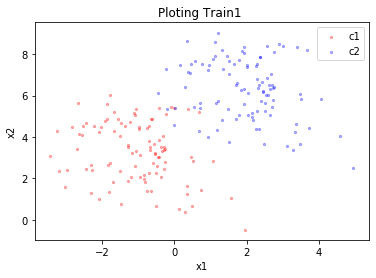

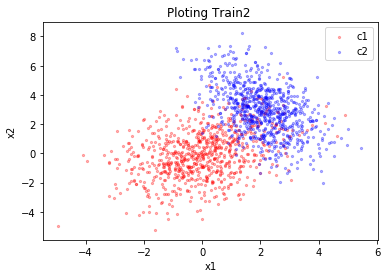

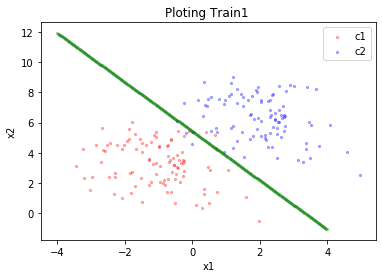

In [9]:
plt.scatter(X1_c1["x1"],X1_c1["x2"], label = 'c1', c = 'r',s=5, alpha=0.3)
plt.scatter(X1_c2["x1"],X1_c2["x2"], label = 'c2', c = 'b',s=5, alpha=0.3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().set(title='Ploting Train1 ')
plt.legend(loc='upper right')
plt.show()

plt.scatter(X2_c1["x1"],X2_c1["x2"], label = 'c1', c = 'r',s=5, alpha=0.3)
plt.scatter(X2_c2["x1"],X2_c2["x2"], label = 'c2', c = 'b',s=5, alpha=0.3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().set(title='Ploting Train2 ')
plt.legend(loc='upper right')
plt.show()

####################################################################################################################
#x1 on x-axis and x2 on y-axis
#x2 =(c-ax1)/b
#solve for g1(x) = g2(x), -3.30*x1-2.03*x2 
x1 = np.arange(-4,4,0.02)

plt.scatter(X1_c1["x1"],X1_c1["x2"], label = 'c1', c = 'r',s=5, alpha=0.3)
plt.scatter(X1_c2["x1"],X1_c2["x2"], label = 'c2', c = 'b',s=5, alpha=0.3)
plt.scatter(x1, (-11 + 3.3*x1)/(-2.03),c = 'g',s=5, alpha=0.3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().set(title='Ploting Train1 ')
plt.legend(loc='upper right')
plt.show()


## Part B: Implement Naive Bayes Classifier

In [10]:
#Implement PART B:
#get test data
test1 = pd.read_csv("test1.csv")
test2 = pd.read_csv("test2.csv")


In [11]:
print("Calculate mean vector and covariance matrix for train 1")

print("for class 1")

mu1_c1 = train1.mu_c1
print("mean:\n",mu1_c1.values)

print("covariance matrix:\n",covmat1_c1.values)
print("\n")
print("for class 2")

mu1_c2 = train1.mu_c2
print("mean:\n",mu1_c2.values)

print("covariance matrix:\n",covmat1_c2.values)

print("\n")
print("Calculate mean vector and covariance matrix for train 2")

print("for class 1")

mu2_c1 = train2.mu_c1
print("mean:\n",mu2_c1.values)

print("covariance matrix:\n",covmat2_c1.values)
print("\n")
print("for class 2")

mu2_c2 = train2.mu_c2
print("mean:\n",mu2_c2.values)

print("covariance matrix:\n",covmat2_c2.values)


Calculate mean vector and covariance matrix for train 1
for class 1
mean:
 [[-1.04624698]
 [ 3.26924606]]
covariance matrix:
 [[ 1.13557089 -0.37320387]
 [-0.37320387  2.08327195]]


for class 2
mean:
 [[1.95375302]
 [6.26924606]]
covariance matrix:
 [[ 1.13557089 -0.37320387]
 [-0.37320387  2.08327195]]


Calculate mean vector and covariance matrix for train 2
for class 1
mean:
 [[ 0.00246486]
 [-0.01971604]]
covariance matrix:
 [[1.91970895 0.85690451]
 [0.85690451 2.83579458]]


for class 2
mean:
 [[2.0536608 ]
 [2.97765078]]
covariance matrix:
 [[ 0.99645235 -0.81777973]
 [-0.81777973  2.94594199]]


In [12]:
#Get Values of Test sets(test1 and test2)
t1 = Train(test1)
Xt1  = t1.X
Xt1_c1 = t1.X_c1
Xt1_c2 = t1.X_c2
Nt1_c1 = t1.N_c1
Nt1_c2 = t1.N_c2


t2 = Train(test2)
Xt2  = t2.X
Xt2_c1 = t2.X_c1
Xt2_c2 = t2.X_c2
Nt2_c1 = t2.N_c1
Nt2_c2 = t2.N_c2


In [13]:
#Create function mahalanobis distance and euclidean distance. Because we use these distance function to calculate gi(x) 

def mahalanobis(x=None, mu=None, cov=None):
    #((x-mu_ci).T) * (inv_cov) * (x-mu_ci)
    x_minus_mu = x.values - mu
    #print(X.values)
    #print(mu)
    #print(x_minus_mu)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu.T, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu)
    return mahal.diagonal()

def euclidean(x=None, mu=None):
    #((x-mu_ci).T) * (x-mu_ci)
    x_minus_mu = x.values - mu
    #print(X.values)
    #print(mu)
    #print(x_minus_mu)
    euclid = np.dot(x_minus_mu.T, x_minus_mu)
    return euclid.diagonal()

In [14]:
#gi(x) funtction for 3 cases
#
#gix(mu,mu_i,covmat,covmat_i,x,p,pc_i)
#
#mu:[mu_c1 mu_c2]
#mu_i: mu_c1 or mu_c2
#covmat:[covmat_c1 covmat_c2]
#covmat_i: covmat_c1 or covmat_c2
#x:test features [x1 x2]
#p:[p_c1 p_c2]
#pc_i: pc_1 or pc_2
# 
#covmat_ci or covmat_i has 2x2 dimensions[[var_ci(x1) cov_ci(x1,x2)]
#                                         [cov_ci(x2,x1) var_ci(x2)]]                    
#for exp:
#covmat[0][0][0] = var_c1(x1)
#covmat[1][1][1] = var_c2(x2)
# 
#case1: cov_c1 ==cov_c1 and mu_c1=!mu_c2
#
#case2: cov_c1 = var_c1*I so, var_c1(x1) == var_c1(x2) 
#       cov_c2 = var_c2*I so, var_c2(x1) == var_c2(x2) 
#
#case3: general case

def gix(mu,mu_i,covmat,covmat_i,x,p,pc_i):
    #compare cov_matrix(cov_c1=?cov_c2) and mu_c1 =? mu_c2
    if np.allclose(covmat[0].values,covmat[1].values) and not(np.allclose(mu[0].values,mu[1].values)) : 
        if p[0] == p[1]:
            #gi(x) = (-1/2) * (M||x-mu_ci||)^2 , M||x-mu_ci|| is mahalanobis distance
            #mahalanabis(x,mu_ci,covmat_ci), mu[0] = mu_c1, mu[1] = mu_c2
            mahal = mahalanobis(x, mu_i.values,covmat_i.values)
            g_ix = (-0.5)*(mahal)
            return g_ix
        else:
            #gi(x) = (-1/2) * (M||x-mu_ci||)^2 + ln(pc(i))
            mahal = mahalanobis(x, mu_i.values,covmat_i.values)
            g_ix_l = (-0.5)*(mahal)
            g_ix = (g_ix_l) + np.log(pc_i)  
            return g_ix
    
    #detect covmatrix_i = variance_i*I, i = 1,2
    elif np.allclose(covmat[0][0][0],covmat[0][1][1]) and np.allclose(covmat[1][0][0],covmat[1][1][1]):
        if p[0] == p[1]:
            #gi(x) = - (E||x-mu_ci||)^2 , E||x-mu_ci|| is euclidean distance
            #euclidean(x,mu_ci), mu[0] = mu_c1, mu[1] = mu_c2
            euclid = euclidean(x,mu_i.values)
            g_ix = (-1) * (euclid)
            return g_ix
        else:
            #gi(x) = (-1/(2*var))(E||x-mu_ci||)^2 + ln(pc(i))
            euclid = euclidean(x,mu_i.values)
            var_i = covmat_i.values[0][0]
            g_ix = (-0.5*var_i) * (euclid) + np.log(pc_i)  
            return g_ix
    else:
        #gi(x) = (-1/2) * (x-mu_ci).T * inv_cov * (x-mu_ci) -(0.5*ln(det(covmat)) + ln(pc(i))
        x_minus_mu = x.values - mu_i.values
        inv_covmat = np.linalg.inv(covmat_i.values)
        l1 = np.dot(x_minus_mu.T, inv_covmat)
        l2 = np.dot(l1, x_minus_mu)
        r1 = np.log(np.linalg.det(covmat_i.values))
            
        g_ix = (-1/2) * l2 - (1/2) * r1 + np.log(pc_i)  
        return g_ix

In [15]:
#APPLY the model and CALCULATE gi(x) values of each class for test1 features on train1
#and store them in the dis_func_1
#Xt1.shape[0] = number of test1 samples

dis_func_1 = [] #store gi(x)
for j in range(0,Xt1.shape[0]): 
    gix_list = [] #[g1(x) g2(x)]
    Xtest_j = Xt1.values[j] #features
    Xtest_j = pd.DataFrame(data=Xtest_j)
    for i in range(0,2): 
        g_ix = gix(mulist1,mulist1[i],covmatlist1,covmatlist1[i],Xtest_j,plist1,plist1[i])
        gix_list.append(g_ix)
    #print(gix_list) 
    dis_func_1.append(gix_list)
    


In [16]:
#APPLY the model and CALCULATE gi(x) values of each class for test2 features on train2
#and store them in the dis_func_2
#Xt2.shape[0] = number of test2 samples

dis_func_2 = [] #store gi(x)
for j in range(0,Xt2.shape[0]):
    gix_list = [] #[g1(x) g2(x)]
    Xtest_j = Xt2.values[j] #features
    Xtest_j = pd.DataFrame(data=Xtest_j)
    for i in range(0,2): 
        g_ix = gix(mulist2,mulist2[i],covmatlist2,covmatlist2[i],Xtest_j,plist2,plist2[i])
        gix_list.append(g_ix)
    #print(gix_list) 
    dis_func_2.append(gix_list)

In [17]:
#Predict y function for test features
#if g1(x) > g2(x), y = 0 
#if g2(x) > g1(x), y = 1
#here in g1(x) = g2(x) case, I assigned y to 0.

def predict_y(dis_func,N):
    y_pred = []
    for i in range(N):
        if dis_func[i][0] >= dis_func[i][1]: #if g1(x) > g2(x), predict label is class1:
            y = 0
        else:
            y = 1
        y_pred.append(y)
    return y_pred

In [18]:
#PREDICT Y FOR TEST1 FEATURES
y_pred_list_1 = predict_y(dis_func_1,Xt1.shape[0])

In [19]:
#PREDICT Y FOR TEST2 FEATURES
y_pred_list_2 = predict_y(dis_func_2,Xt2.shape[0])

In [20]:
#FIND ACCURACY AND ERROR FOR PREDICT LABEL Y FOR TEST1 FEATURES
count_acc = 0
count_err = 0
for i in range(0,test1.shape[0]):
    y = test1["y"].values[i]
    y_pred = y_pred_list_1[i]
    if y == y_pred:
        count_acc += 1
    else:
        count_err +=1
print("accuracy rate: %", (count_acc/test1.shape[0])*100)
print("error rate: %", (count_err/test1.shape[0])*100)

accuracy rate: % 98.0
error rate: % 2.0


In [21]:
#FIND ACCURACY AND ERROR FOR PREDICT LABEL Y FOR TEST2 FEATURES
count_acc = 0
count_err = 0
for i in range(0,test2.shape[0]):
    y = test2["y"].values[i]
    y_pred = y_pred_list_2[i]
    if y == y_pred:
        count_acc += 1
    else:
        count_err +=1
print("accuracy rate: %", (count_acc/test2.shape[0])*100)
print("error rate: %", (count_err/test2.shape[0])*100)

accuracy rate: % 88.5
error rate: % 11.5


In [22]:
#Combine train1 set and test1 set = final1 set
final1 = pd.concat([df1,test1])
final1

,x1,x2,y
0,-0.260234,2.767817,0
1,3.466190,6.054691,1
2,-2.036224,4.491902,0
3,2.434426,6.638656,1
4,-0.541338,3.210246,0
...,...,...,...
95,-1.477077,2.388638,0
96,2.410858,8.014465,1
97,-1.886254,4.682919,0
98,-0.157498,3.740511,0


In [23]:
from sklearn.model_selection import KFold


In [24]:
#Train and Get Values of Final1 set
f1 = Train(final1)
Xf1  = f1.X #features of final1 set
yf1= f1.y #label of final1 set
Xf1_c1 = f1.X_c1
Xf1_c2 = f1.X_c2
Nf1_c1 = f1.N_c1
Nf1_c2 = f1.N_c2


In [25]:
#APPLY 5-FOLD CROSS VALIDATION TO FINAL1 SET
#Split shuffle
kf = KFold(n_splits=5,shuffle=True)
kf.get_n_splits(Xf1.values)
print(kf)
#random.seed(1)

KFold(n_splits=5, random_state=None, shuffle=True)


In [26]:
#FIND Accuracy and Error rate each train set(splited from final1 set)
accuracy_model = []
for train_index, test_index in kf.split(Xf1.values):
    # Split train-test
    X_train, X_test = Xf1.values[train_index], Xf1.values[test_index]
    y_train, y_test = yf1.values[train_index], yf1.values[test_index]
    
    #print(X_train.shape)
    #print(X_test.shape)
    #print(train_index)
    #print("***********************************************************")
    
    # TRAIN THE MODEL, FIND CLASS AND CALCULATE ACCURACY
    
    #Convert Pandas for more comfortable processing
    X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])
    X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])
    y_train = pd.DataFrame(y_train, columns = ['y'])
    y_test = pd.DataFrame(y_test, columns = ['y'])
    
    #we need to concat Xtrain and y_train to apply Train class that I created above.
    k_train = pd.concat([X_train,y_train], axis=1) 
    
    #train and get values
    traink = Train(k_train)
    Xk_c1 = traink.X_c1
    Xk_c2 = traink.X_c2
    
    Nk_c1 = traink.N_c1
    Nk_c2 = traink.N_c2

    pk_c1 = traink.p_c1
    pk_c2 = traink.p_c2
    
    covmatk_c1 = traink.calcovmat(Xk_c1, Nk_c1)
    covmatk_c2 = traink.calcovmat(Xk_c2, Nk_c2)

    mulistk = traink.mu_list()

    covmatlistk = traink.covmat_list()

    plistk = traink.p_list()
    
    #APPLY the model and CALCULATE gi(x) values of each class for test features
   
    dis_func_k = [] #store gi(x)
    
    for j in range(0,X_test.shape[0]):
        gix_list = [] #[g1(x) g2(x)]
        Xtest_j = X_test.values[j] #features
        Xtest_j = pd.DataFrame(data=Xtest_j)
        for i in range(0,2): 
            g_ix = gix(mulistk,mulistk[i],covmatlistk,covmatlistk[i],Xtest_j,plistk,plistk[i])
            gix_list.append(g_ix)

        dis_func_k.append(gix_list)#[[g1(x) g2(x)],[g1(x) g2(x)],[g1(x) g2(x)],.....]
    
    #PREDICT Y FOR TEST-K FEATURES
    y_pred_list_k = predict_y(dis_func_k,X_test.shape[0])
    
    #TO FIND ACCURACY AND ERROR FOR PREDICT LABEL Y FOR TEST1 FEATURES
    count_acc = 0
    count_err = 0
    for i in range(0,X_test.shape[0]):
        y = y_test["y"].values[i] #get real label value
        y_pred = y_pred_list_k[i] #get predicted label value
        if y == y_pred:
            count_acc += 1
        else:
            count_err +=1
    print("accuracy rate: %", (count_acc/X_test.shape[0])*100)
    print("error rate: %", (count_err/X_test.shape[0])*100)
    print("***********************************************************************************")
    accuracy_model.append((count_acc/X_test.shape[0])*100)
print("accuracy:",accuracy_model)


accuracy rate: % 96.66666666666667
error rate: % 3.3333333333333335
***********************************************************************************
accuracy rate: % 95.0
error rate: % 5.0
***********************************************************************************
accuracy rate: % 98.33333333333333
error rate: % 1.6666666666666667
***********************************************************************************
accuracy rate: % 98.33333333333333
error rate: % 1.6666666666666667
***********************************************************************************
accuracy rate: % 96.66666666666667
error rate: % 3.3333333333333335
***********************************************************************************
accuracy: [96.66666666666667, 95.0, 98.33333333333333, 98.33333333333333, 96.66666666666667]


In [27]:
#Calculate average Accuracy Rate
avr_acc = np.mean(accuracy_model)
print("avarage accuracy:",avr_acc)

avarage accuracy: 97.0


In [28]:
#Combine train2 set and test2 set = final2 set
final2 = pd.concat([df2,test2])
final2

,x1,x2,y
0,-0.321883,-0.399495,0
1,-1.188954,-4.457593,0
2,2.852158,1.696284,1
3,2.788976,4.119233,1
4,0.507563,-1.118629,0
...,...,...,...
395,0.485387,1.552155,0
396,-0.806611,-1.639893,0
397,0.492477,4.544232,1
398,2.853715,-0.149648,1


In [29]:
#Get Values of Final2 set
f2 = Train(final2)
Xf2  = f2.X #features of final2 set
yf2= f2.y #label of final2 set
Xf2_c1 = f2.X_c1
Xf2_c2 = f2.X_c2
Nf2_c1 = f2.N_c1
Nf2_c2 = f2.N_c2

In [30]:
#APPLY 5-FOLD CROSS VALIDATION TO FINAL2 SET
#Split shuffle
kf = KFold(n_splits=5,shuffle=True)
kf.get_n_splits(Xf2.values)
print(kf)
#random.seed(1)

KFold(n_splits=5, random_state=None, shuffle=True)


In [31]:
#FIND Accuracy and Error rate each train set(splited from final1 set)
accuracy_model = []
for train_index, test_index in kf.split(Xf2.values):
    # Split train-test
    X_train, X_test = Xf2.values[train_index], Xf2.values[test_index]
    y_train, y_test = yf2.values[train_index], yf2.values[test_index]
    
    #print(X_train.shape)
    #print(X_test.shape)
    #print(train_index)
    #print("***********************************************************")
    
    # TRAIN THE MODEL, FIND CLASS AND CALCULATE ACCURACY
    
    #Convert Pandas for more comfortable processing
    X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])
    X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])
    y_train = pd.DataFrame(y_train, columns = ['y'])
    y_test = pd.DataFrame(y_test, columns = ['y'])
    
    #we need to concat Xtrain and y_train to apply Train class that I created above.
    k_train = pd.concat([X_train,y_train], axis=1) 
    
    #train and get values
    traink = Train(k_train)
    Xk_c1 = traink.X_c1
    Xk_c2 = traink.X_c2
    
    Nk_c1 = traink.N_c1
    Nk_c2 = traink.N_c2

    pk_c1 = traink.p_c1
    pk_c2 = traink.p_c2
    
    covmatk_c1 = traink.calcovmat(Xk_c1, Nk_c1)
    covmatk_c2 = traink.calcovmat(Xk_c2, Nk_c2)

    mulistk = traink.mu_list()

    covmatlistk = traink.covmat_list()

    plistk = traink.p_list()
    
     #APPLY the model and CALCULATE gi(x) values of each class for test features
   
    dis_func_k = [] #store gi(x)
    
    for j in range(0,X_test.shape[0]):
        gix_list = [] #[g1(x) g2(x)]
        Xtest_j = X_test.values[j] #features
        Xtest_j = pd.DataFrame(data=Xtest_j)
        for i in range(0,2): 
            g_ix = gix(mulistk,mulistk[i],covmatlistk,covmatlistk[i],Xtest_j,plistk,plistk[i])
            gix_list.append(g_ix)

        dis_func_k.append(gix_list) #[[g1(x) g2(x)],[g1(x) g2(x)],[g1(x) g2(x)],.....]
    
    #APPLY THE MODEL AND PREDICT Y FOR TEST-K FEATURES
    y_pred_list_k = predict_y(dis_func_k,X_test.shape[0]) 
    
    #TO FIND ACCURACY AND ERROR FOR PREDICT LABEL Y FOR TEST1 FEATURES
    count_acc = 0
    count_err = 0
    for i in range(0,X_test.shape[0]):
        y = y_test["y"].values[i] #get real label value
        y_pred = y_pred_list_k[i] #get predicted label value 
        if y == y_pred:
            count_acc += 1
        else:
            count_err +=1
    print("accuracy rate: %", (count_acc/X_test.shape[0])*100)
    print("error rate: %", (count_err/X_test.shape[0])*100)
    print("***********************************************************************************")
    accuracy_model.append((count_acc/X_test.shape[0])*100)
print("accuracy:",accuracy_model)


accuracy rate: % 91.5
error rate: % 8.5
***********************************************************************************
accuracy rate: % 88.75
error rate: % 11.25
***********************************************************************************
accuracy rate: % 88.5
error rate: % 11.5
***********************************************************************************
accuracy rate: % 89.75
error rate: % 10.25
***********************************************************************************
accuracy rate: % 90.25
error rate: % 9.75
***********************************************************************************
accuracy: [91.5, 88.75, 88.5, 89.75, 90.25]


In [32]:
#Calculate average Accuracy Rate
avr_acc = np.mean(accuracy_model)
print("avarage accuracy:",avr_acc)

avarage accuracy: 89.75


# C-4
When we train train1 set and test on test1 set, we find %98 accuracy. Then we combined train1 set and test1 set. Then when we apply 5-kold cross-validation, we find %96.6 average accuracy. So, we find worse accuracy then first case. Still, in my opinion, the second situation is safer. Because if we use a single dataset as in the beginning, our success depends on whether there is a proper distribution in this dataset. But in the second case, that is, when we apply k-fold, we can achieve a more reliable result by distributing the dataset randomly.

We can see an example of this in train2 set. 
When we train train2 set and test on test2 set, we find %88.5 accuracy. Then we combined train2 set and test2 set. Then when we apply 5-kold cross-validation, we find %89.7 average accuracy.  So, we find better accuracy then first case.This may be because the data distribution in the train2 set is not good.


### Knn and then we can turn the bayesian classifier application into a function.

In [33]:
def knn(Xf,yf): #Xf features of final dataset, yf = label of final dataset
    #Split shuffle
    kf = KFold(n_splits=5,shuffle=True)
    kf.get_n_splits(Xf.values)
    print(kf)
    accuracy_model = []
    for train_index, test_index in kf.split(Xf.values):
        # Split train-test
        X_train, X_test = Xf.values[train_index], Xf.values[test_index]
        y_train, y_test = yf.values[train_index], yf.values[test_index]

        # TRAIN THE MODEL, FIND CLASS AND CALCULATE ACCURACY
    
        #Convert Pandas for more comfortable processing
        X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])
        X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])
        y_train = pd.DataFrame(y_train, columns = ['y'])
        y_test = pd.DataFrame(y_test, columns = ['y'])
    
        #we need to concat Xtrain and y_train to apply Train class that I created above.
        k_train = pd.concat([X_train,y_train], axis=1) 
        
        #train and get values 
        traink = Train(k_train)
        Xk_c1 = traink.X_c1
        Xk_c2 = traink.X_c2
    
        Nk_c1 = traink.N_c1
        Nk_c2 = traink.N_c2

        pk_c1 = traink.p_c1
        pk_c2 = traink.p_c2
    
        covmatk_c1 = traink.calcovmat(Xk_c1, Nk_c1)
        covmatk_c2 = traink.calcovmat(Xk_c2, Nk_c2)

        mulistk = traink.mu_list()

        covmatlistk = traink.covmat_list()

        plistk = traink.p_list()
    
        #APPLY the model and CALCULATE gi(x) values of each class for test features
   
        dis_func_k = [] #store gi(x)
    
        for j in range(0,X_test.shape[0]):
            gix_list = [] #[g1(x) g2(x)]
            Xtest_j = X_test.values[j] #features
            Xtest_j = pd.DataFrame(data=Xtest_j)
            for i in range(0,2): 
                g_ix = gix(mulistk,mulistk[i],covmatlistk,covmatlistk[i],Xtest_j,plistk,plistk[i])
                gix_list.append(g_ix)

            dis_func_k.append(gix_list) #[[g1(x) g2(x)],[g1(x) g2(x)],[g1(x) g2(x)],.....]
    
        #APPLY THE MODEL AND PREDICT Y FOR TEST-K FEATURES
        y_pred_list_k = predict_y(dis_func_k,X_test.shape[0])
    
        #TO FIND ACCURACY AND ERROR FOR PREDICT LABEL Y FOR TEST1 FEATURES
        count_acc = 0
        count_err = 0
        for i in range(0,X_test.shape[0]):
            y = y_test["y"].values[i] #get real label value 
            y_pred = y_pred_list_k[i] #get predicted label value 
            if y == y_pred:
                count_acc += 1
            else:
                count_err +=1
        print("accuracy rate: %", (count_acc/X_test.shape[0])*100)
        print("error rate: %", (count_err/X_test.shape[0])*100)
        print("***********************************************************************************")
        accuracy_model.append((count_acc/X_test.shape[0])*100)
    print("accuracy:",accuracy_model)
    print("***********************************************************************************")
    avr_acc = np.mean(accuracy_model)
    print("avarage accuracy:",avr_acc)

In [34]:
#APPLY KNN AND BAYES MODEL THAT I CREATED
knn(Xf1,yf1)

KFold(n_splits=5, random_state=None, shuffle=True)
accuracy rate: % 96.66666666666667
error rate: % 3.3333333333333335
***********************************************************************************
accuracy rate: % 98.33333333333333
error rate: % 1.6666666666666667
***********************************************************************************
accuracy rate: % 90.0
error rate: % 10.0
***********************************************************************************
accuracy rate: % 98.33333333333333
error rate: % 1.6666666666666667
***********************************************************************************
accuracy rate: % 100.0
error rate: % 0.0
***********************************************************************************
accuracy: [96.66666666666667, 98.33333333333333, 90.0, 98.33333333333333, 100.0]
***********************************************************************************
avarage accuracy: 96.66666666666666


In [35]:
#APPLY KNN AND BAYES MODEL THAT I CREATED
knn(Xf2,yf2)

KFold(n_splits=5, random_state=None, shuffle=True)
accuracy rate: % 89.0
error rate: % 11.0
***********************************************************************************
accuracy rate: % 88.0
error rate: % 12.0
***********************************************************************************
accuracy rate: % 90.5
error rate: % 9.5
***********************************************************************************
accuracy rate: % 90.5
error rate: % 9.5
***********************************************************************************
accuracy rate: % 90.75
error rate: % 9.25
***********************************************************************************
accuracy: [89.0, 88.0, 90.5, 90.5, 90.75]
***********************************************************************************
avarage accuracy: 89.75


## Part D: Redo the experiments on modified Dataset 2

In [36]:
#Train and Get values
train2m = Train(df2m)
X2m_c1 = train2m.X_c1
X2m_c2 = train2m.X_c2
N2m_c1 = train2m.N_c1
N2m_c2 = train2m.N_c2
p2m_c1 = train2m.p_c1
p2m_c2 = train2m.p_c2

covmat2m_c1 = train2m.calcovmat(X2m_c1, N2m_c1)
covmat2m_c2= train2m.calcovmat(X2m_c2, N2m_c2)

mulist2m = train2m.mu_list()

covmatlist2m = train2m.covmat_list()

plist2m = train2m.p_list()





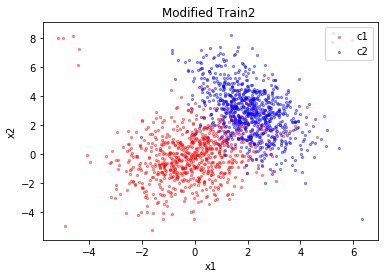

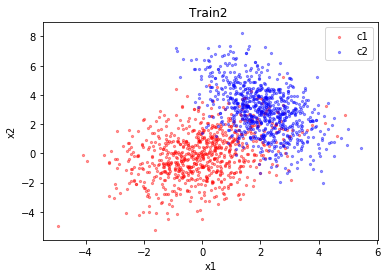

In [37]:
#Plot Modified Train2 set
plt.scatter(X2m_c1["x1"],X2m_c1["x2"], label = 'c1', c = 'r',s=5, alpha=0.4)
plt.scatter(X2m_c2["x1"],X2m_c2["x2"], label = 'c2', c = 'b',s=5, alpha=0.4)
plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().set(title='Modified Train2 ')
plt.legend(loc='upper right')
plt.show()


plt.scatter(X2_c1["x1"],X2_c1["x2"], label = 'c1', c = 'r',s=5, alpha=0.4)
plt.scatter(X2_c2["x1"],X2_c2["x2"], label = 'c2', c = 'b',s=5, alpha=0.4)
plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().set(title='Train2 ')
plt.legend(loc='upper right')
plt.show()

# D-1
There are new values in the upper left corner and down right corner of the x1-x2 chart. So, data distribution spread more than train2 set out.

In [38]:
#APPLY the model and CALCULATE gi(x) values of each class for test2 features on modified train2
#and store them in the dis_func_2m
#Xt2.shape[0] = number of test1 samples

dis_func_2m = [] #store gi(x)

for j in range(0,Xt2.shape[0]):
    gix_list = [] #[g1(x) g2(x)]
    Xtest_j = Xt2.values[j] #features
    Xtest_j = pd.DataFrame(data=Xtest_j)
    for i in range(0,2): 
        g_ix = gix(mulist2m,mulist2m[i],covmatlist2m,covmatlist2m[i],Xtest_j,plist2m,plist2m[i])
        gix_list.append(g_ix)
        
    dis_func_2m.append(gix_list) #[[g1(x) g2(x)],[g1(x) g2(x)],[g1(x) g2(x)],.....]

In [39]:
#PREDICT Y FOR TEST2 FEATURES
y_pred_list_2m = predict_y(dis_func_2m,Xt2.shape[0])

In [40]:
#FIND ACCURACY AND ERROR RATE FOR PREDICT LABEL Y FOR TEST2 FEATURES ON MODIFIED TRAIN2
count_acc = 0
count_err = 0
for i in range(0,test2.shape[0]):
    y = test2["y"].values[i]
    y_pred = y_pred_list_2m[i]
    if y == y_pred:
        count_acc += 1
    else:
        count_err +=1
print("accuracy rate: %", (count_acc/test2.shape[0])*100)
print("error rate: %", (count_err/test2.shape[0])*100)

accuracy rate: % 87.75
error rate: % 12.25


# D-3
Here, we find %87.75 accuracy. When we train train2 set, we find %88.5 accuracy. So, we find worse accuracy by use modified train2 set. 

I have printed the covariance matrices for both datasets below. If we look at the variances here, we see that the variance values are higher than A. So, data distribution spread more than train2 set out. 

By looking at these values, at Bayes Classifier, as the data distribution increases, it becomes more difficult to predict and we find worse accuracy.

In [41]:
print("For Train 2")
print("Covariance matrix for class1")
print(covmatlist2[0].values)
print("******************")
print("Covariance matrix for class2")
print(covmatlist2[1].values)

print("*************************************************************************************************")

print("For Modified Train 2")
print("Covariance matrix for class1")
print(covmatlist2m[0].values)
print("******************")
print("Covariance matrix for class2")
print(covmatlist2m[1].values)


For Train 2
Covariance matrix for class1
[[1.91970895 0.85690451]
 [0.85690451 2.83579458]]
******************
Covariance matrix for class2
[[ 0.99645235 -0.81777973]
 [-0.81777973  2.94594199]]
*************************************************************************************************
For Modified Train 2
Covariance matrix for class1
[[2.04588459 0.63042127]
 [0.63042127 3.17419239]]
******************
Covariance matrix for class2
[[ 1.07756488 -0.77916391]
 [-0.77916391  3.09420853]]
